In [7]:
import scripts.read_land_use_no_gdal as land_use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
polygon = "POLYGON ((144.0229424345357 -37.55299953752239, 144.02019905996406 -37.97282887730929, 144.6632499098556 -37.972670022747636, 144.66240633494579 -37.552454710108975, 144.0229424345357 -37.55299953752239))"
array, unique_classes = land_use.read_land_use(buffer=0, 
                                               area_filter=polygon,
                                              processes=8)

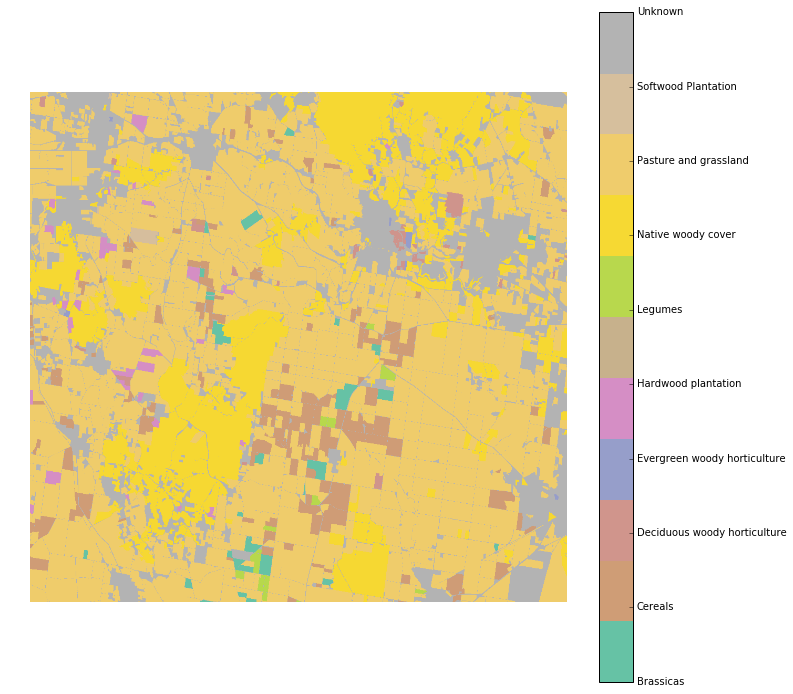

In [3]:
plt.figure(figsize=(12, 12))
plt.axis('off')
im = plt.imshow(array, cmap=plt.cm.get_cmap('Set2', len(unique_classes)))
plt.colorbar(ticks=range(len(unique_classes)), format=plt.FuncFormatter(lambda val, loc: unique_classes[val]))
plt.show()

In [4]:
array, unique_classes = land_use.read_land_use(buffer=-0.0001, 
                                               area_filter=polygon,
                                              processes=16)

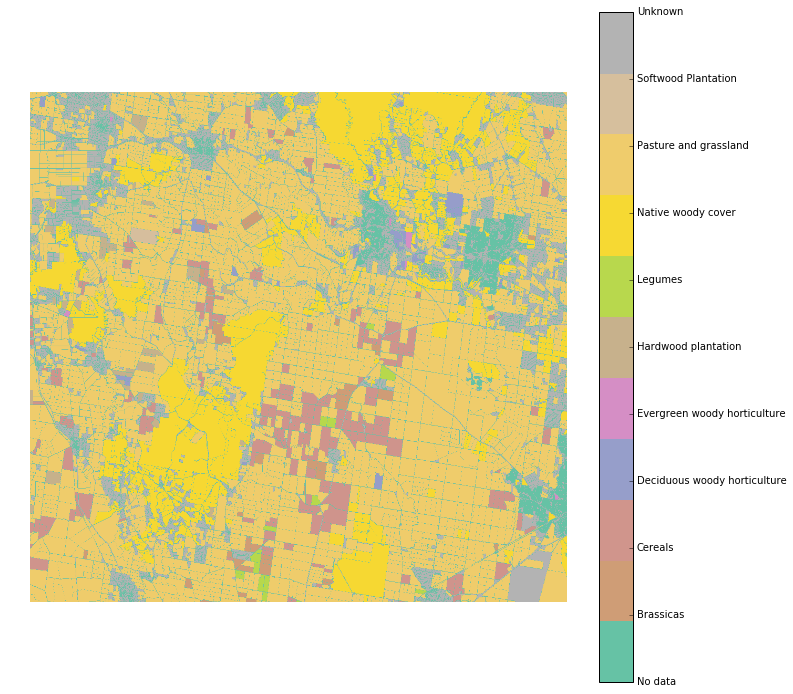

In [5]:
plt.figure(figsize=(12, 12))
plt.axis('off')
im = plt.imshow(array, cmap=plt.cm.get_cmap('Set2', len(unique_classes)))
plt.colorbar(ticks=range(len(unique_classes)), format=plt.FuncFormatter(lambda val, loc: unique_classes[val]))
plt.show()

In [6]:
array

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       ..., 
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8]], dtype=uint8)

In [18]:
df = pd.DataFrame(array)
df['x'] = df.index
label_set = pd.melt(df, id_vars='x')

In [26]:
r = label_set.sort_values(by=['x', 'variable'])['value']

In [28]:
np.unique(r.as_matrix())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)